In [1]:
%matplotlib inline
import rebound
import numpy as np
import matplotlib.pyplot as plt
import reboundx
from reboundx import constants
Mj = 955e-6 #...Jupiter mass in Solar units

In [2]:
#---HD 147018---#
sim = rebound.Simulation()
sim.add(m=0.927)
sim.add(a=0.238900,e=0.468600,m=0.00202983,omega=66.0054*np.pi/180.0,inc=35.614629*np.pi/180,Omega=0.,M=0.698350*np.pi/180.0)
sim.add(a=1.9230,e=0.133000,m=0.0062886114,omega=136.865*np.pi/180.0,inc=3.3853710*np.pi/180,Omega=180.*np.pi/180.,M=-293.214*np.pi/180.0)
#sim.move_to_com() # Moves to the center of momentum frame
sim.move_to_hel()
#rebound.OrbitPlot(sim, unitlabel="[AU]", color=False, periastron=True, glow=True,fancy=False,slices=False);

In [ ]:
#---HD 38529---#
sim = rebound.Simulation()
sim.add(m=1.48)
sim.add(a=0.127,e=0.244,m=0.803*Mj,omega=303.6*np.pi/180.0,inc=60.5*np.pi/180,Omega=0.*np.pi/180.)
sim.add(a=3.60,e=0.355,m=12.26*Mj,omega=37.9*np.pi/180.0,inc=0.9*np.pi/180,Omega=180.*np.pi/180.)
sim.move_to_com() # Moves to the center of momentum frame
rebound.OrbitPlot(sim, unitlabel="[AU]", color=False, periastron=True, glow=True,fancy=False,slices=False);


In [ ]:
#---HD 168433---#
sim = rebound.Simulation()
sim.add(m=)
sim.add(a=,e=,m=0.803*Mj,omega=303.6*np.pi/180.0,inc=60.5*np.pi/180,Omega=0.*np.pi/180.)
sim.add(a=,e=,m=12.26*Mj,omega=37.9*np.pi/180.0,inc=0.9*np.pi/180,Omega=180.*np.pi/180.)
#sim.move_to_com() # Moves to the center of momentum frame
sim.move_to_hel()
rebound.OrbitPlot(sim, unitlabel="[AU]", color=False, periastron=True, glow=True,fancy=False,slices=False);


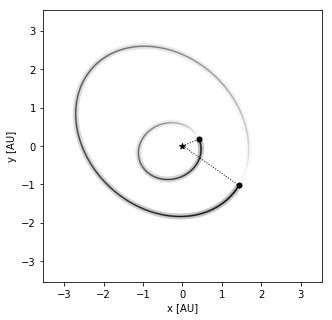

In [3]:
#---HD 202206---#
sim = rebound.Simulation()
sim.add(m=1.15)
sim.add(a=0.812,e=0.435,m=16.59*Mj,omega=71.9*np.pi/180.0,inc=7.9*np.pi/180,Omega=311*np.pi/180.)
sim.add(a=2.43,e=0.267,m=2.179*Mj,omega=195.5*np.pi/180.0,inc=33.1*np.pi/180,Omega=131*np.pi/180.)
#sim.move_to_com() # Moves to the center of momentum frame
sim.move_to_hel()
rebound.OrbitPlot(sim, unitlabel="[AU]", color=False, periastron=True, glow=True,fancy=False,slices=False);

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
28%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
56%
57%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


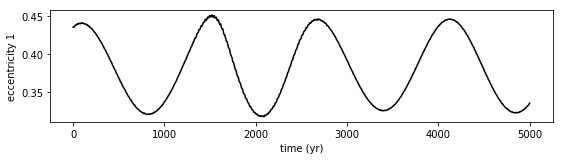

In [4]:
#...Integrate Newtonian

N = 1000
nyears = 0.05e5
times = np.linspace(0.,2.*np.pi*nyears,N)

pomega1 = np.zeros(N)
pomega2 = np.zeros(N)
e1 = np.zeros(N) 
#e2 = np.zeros(N) 
inc1 = np.zeros(N)
inc2 = np.zeros(N)
Omega1 = np.zeros(N) 
Omega2 = np.zeros(N) 

for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    #pomega1[i] = sim.particles[1].pomega
    #pomega2[i] = sim.particles[2].pomega
    e1[i] = sim.particles[1].e
    #e2[i] = sim.particles[2].e
    #inc1[i] = sim.particles[1].inc
    #inc2[i] = sim.particles[2].inc
    #Omega1[i] = sim.particles[1].Omega
    #Omega2[i] = sim.particles[2].Omega
    
    if i%10 == 0:
        print(str(int(i/N*100))+'%')
    
#...Vector-addition of inclination
deltaOmega = Omega1-Omega2
cosimut = np.cos(inc1)*np.cos(inc2)+np.sin(inc1)*np.sin(inc2)*np.cos(deltaOmega)
imut = np.arccos(cosimut)

deltapom = np.degrees(pomega2-pomega1+2*np.pi)%360.

fig = plt.figure(figsize=(9,7))
# ax.set_title("HD 147018, Newtonian")
# ax = plt.subplot(311)
# ax.set_xlabel("time (yr)")
# ax.set_ylabel("mutual inclination (deg)")
# plt.plot(times/(2*np.pi),np.degrees(imut),color='black')

ax = plt.subplot(312)
ax.set_xlabel('time (yr)')
ax.set_ylabel('eccentricity 1')
plt.plot(times/(2*np.pi),e1,color='black')

# ax = plt.subplot(313)
# ax.set_xlabel('time (yr)')
# ax.set_ylabel('$\Delta$pomega')
# plt.plot(times/(2*np.pi),deltapom,color='black')

#plt.savefig('HD_147018_Newt.pdf')

In [ ]:
#...Integrate with GR
rebx = reboundx.Extras(sim)
gr = rebx.add("gr")
gr.params["c"] = constants.C

N = 1000
nyears = 0.05e6
times = np.linspace(0.,2.*np.pi*nyears,N)

pomega1 = np.zeros(N)
pomega2 = np.zeros(N)
e1 = np.zeros(N) 
#e2 = np.zeros(N) 
inc1 = np.zeros(N)
inc2 = np.zeros(N)
Omega1 = np.zeros(N) 
Omega2 = np.zeros(N) 

for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    pomega1[i] = sim.particles[1].pomega
    pomega2[i] = sim.particles[2].pomega
    e1[i] = sim.particles[1].e
    #e2[i] = sim.particles[2].e
    inc1[i] = sim.particles[1].inc
    inc2[i] = sim.particles[2].inc
    Omega1[i] = sim.particles[1].Omega
    Omega2[i] = sim.particles[2].Omega
    
    if i%10 == 0:
        print(str(int(i/N*100))+'%')
        
    
    
#...Vector-addition of inclination
deltaOmega = Omega1-Omega2
cosimut = np.cos(inc1)*np.cos(inc2)+np.sin(inc1)*np.sin(inc2)*np.cos(deltaOmega)
imut = np.arccos(cosimut)

deltapom = np.degrees(pomega2-pomega1+2*np.pi)%360.

fig = plt.figure(figsize=(9,7))

# ax = plt.subplot(311)
# ax.set_xlabel("time (yr)")
# ax.set_ylabel("$i_{\mathrm{mut}}$ (deg)")
# plt.plot(times/(2*np.pi),np.degrees(imut),color='black')

ax = plt.subplot(312)
ax.set_xlabel('time (yr)')
ax.set_ylabel('$e$')
plt.plot(times/(2*np.pi),e1,color='black')

# ax = plt.subplot(313)
# ax.set_xlabel('time (yr)')
# ax.set_ylabel('$\Delta$pomega')
# plt.plot(times/(2*np.pi),deltapom,color='black')

#plt.savefig('HD_147018_GR.pdf',color='black')

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%


0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
28%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
56%
57%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


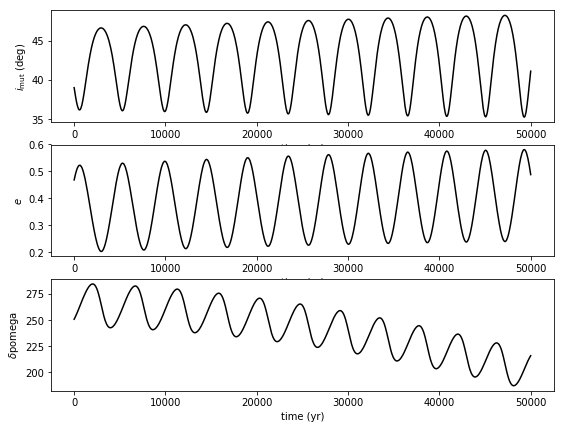

In [3]:
#...Integrate with GR FULL
rebx = reboundx.Extras(sim)
gr = rebx.add("gr_full")
gr.params["c"] = constants.C

N = 1000
nyears = 0.05e6
times = np.linspace(0.,2.*np.pi*nyears,N)

pomega1 = np.zeros(N)
pomega2 = np.zeros(N)
e1 = np.zeros(N) 
#e2 = np.zeros(N) 
inc1 = np.zeros(N)
inc2 = np.zeros(N)
Omega1 = np.zeros(N) 
Omega2 = np.zeros(N) 

for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    pomega1[i] = sim.particles[1].pomega
    pomega2[i] = sim.particles[2].pomega
    e1[i] = sim.particles[1].e
    #e2[i] = sim.particles[2].e
    inc1[i] = sim.particles[1].inc
    inc2[i] = sim.particles[2].inc
    Omega1[i] = sim.particles[1].Omega
    Omega2[i] = sim.particles[2].Omega
    
    if i%10 == 0:
        print(str(int(i/N*100))+'%')
        
    
    
#...Vector-addition of inclination
deltaOmega = Omega1-Omega2
cosimut = np.cos(inc1)*np.cos(inc2)+np.sin(inc1)*np.sin(inc2)*np.cos(deltaOmega)
imut = np.arccos(cosimut)

deltapom = np.degrees(pomega2-pomega1+2*np.pi)%360.

fig = plt.figure(figsize=(9,7))

ax = plt.subplot(311)
ax.set_xlabel("time (yr)")
ax.set_ylabel("$i_{\mathrm{mut}}$ (deg)")
plt.plot(times/(2*np.pi),np.degrees(imut),color='black')

ax = plt.subplot(312)
ax.set_xlabel('time (yr)')
ax.set_ylabel('$e$')
plt.plot(times/(2*np.pi),e1,color='black')

ax = plt.subplot(313)
ax.set_xlabel('time (yr)')
ax.set_ylabel('$\delta$pomega')
plt.plot(times/(2*np.pi),deltapom,color='black')


#plt.savefig('HD_147018_GR_full.pdf')

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.1)
fig.set_size_inches(10, 14)
axs[0] = plt.subplot(311)
axs[0].set_title("HD 147018, Newtonian",fontsize=20)
axs[0].set_xlim(0,50e3)
axs[0].set_ylim(0,60)
axs[0].set_ylabel("$i_{\mathrm{mut}}$ [deg] ",fontsize=20)
plt.plot(times/(2*np.pi),np.degrees(imut),color='black')

axs[1] = plt.subplot(312)
axs[1].set_xlim(0,50e3)
axs[1].set_ylim(0,0.8)
axs[1].set_ylabel('$e_1$',fontsize=20)
plt.plot(times/(2*np.pi),e1,color='black')

axs[2] = plt.subplot(313)
axs[2].set_xlabel('time [yr]',fontsize=20)
axs[2].set_xlim(0,50e3)
axs[2].set_ylim(0,360)
axs[2].set_ylabel('$\Delta\overline{\omega}$ [deg]',fontsize=20)
plt.plot(times/(2*np.pi),deltapom,color='black')



#plt.savefig('HD_147018_Newt.pdf')

In [53]:
plt.close()